In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Importiamo il nostro dataset:

In [3]:
video_games = pd.read_csv("./archive/Video_Games.csv")

Vediam

In [4]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
print(video_games.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [6]:
video_games['User_Score'] = pd.to_numeric(video_games['User_Score'], errors='coerce')

In [7]:
video_games.dropna(axis=0, subset=['Year_of_Release', 'Genre', 'Name', 'User_Score'], inplace=True)

In [8]:
print(video_games.isnull().sum())

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       569
Critic_Count       569
User_Score           0
User_Count           0
Developer           11
Rating              83
dtype: int64


In [9]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7463 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7463 non-null   object 
 1   Platform         7463 non-null   object 
 2   Year_of_Release  7463 non-null   float64
 3   Genre            7463 non-null   object 
 4   Publisher        7461 non-null   object 
 5   NA_Sales         7463 non-null   float64
 6   EU_Sales         7463 non-null   float64
 7   JP_Sales         7463 non-null   float64
 8   Other_Sales      7463 non-null   float64
 9   Global_Sales     7463 non-null   float64
 10  Critic_Score     6894 non-null   float64
 11  Critic_Count     6894 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        7452 non-null   object 
 15  Rating           7380 non-null   object 
dtypes: float64(10), object(6)
memory usage: 991.2+ KB


In [10]:
video_games.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


Convertiamo il tipo della colonna 'year of release' in int per chiarezza

In [11]:
video_games['Year_of_Release'] = video_games['Year_of_Release'].astype(int)


In [12]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7463 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7463 non-null   object 
 1   Platform         7463 non-null   object 
 2   Year_of_Release  7463 non-null   int64  
 3   Genre            7463 non-null   object 
 4   Publisher        7461 non-null   object 
 5   NA_Sales         7463 non-null   float64
 6   EU_Sales         7463 non-null   float64
 7   JP_Sales         7463 non-null   float64
 8   Other_Sales      7463 non-null   float64
 9   Global_Sales     7463 non-null   float64
 10  Critic_Score     6894 non-null   float64
 11  Critic_Count     6894 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        7452 non-null   object 
 15  Rating           7380 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 991.2+ KB


In [13]:
video_games.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Driver,PS,1999,Action,GT Interactive,3.11,2.80,0.02,0.33,6.27,87.0,22.0,8.1,78.0,Reflections Interactive,T
140,Gears of War 3,X360,2011,Shooter,Microsoft Game Studios,4.05,1.59,0.07,0.50,6.21,91.0,96.0,7.8,1504.0,Epic Games,M
141,Kinect Sports,X360,2010,Sports,Microsoft Game Studios,3.92,1.73,0.03,0.51,6.19,73.0,51.0,7.4,95.0,Rare Ltd.,E10+
142,Gears of War,X360,2006,Shooter,Microsoft Game Studios,3.54,1.88,0.07,0.60,6.09,94.0,88.0,8.3,2295.0,Epic Games,M


A questo punto, dopo aver pulito il nostro dataset, predisponiamolo per un'analisi OLAP. Iniziamo quantizzando la colonna 'User_Score':

1. POCO APPREZZATI = [0,6.8];
2.  APPREZZATI = [6.8,8];
4. MOLTO APPREZZATI = [8,9.7];



In [14]:
print(pd.qcut(video_games['User_Score'], q=3))

0           (6.8, 8.0]
2           (8.0, 9.7]
3           (6.8, 8.0]
6           (8.0, 9.7]
7        (-0.001, 6.8]
             ...      
16685       (8.0, 9.7]
16696       (6.8, 8.0]
16700    (-0.001, 6.8]
16706       (6.8, 8.0]
16709    (-0.001, 6.8]
Name: User_Score, Length: 7463, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 6.8] < (6.8, 8.0] < (8.0, 9.7]]


In [15]:
min = [0, 6.8, 8]
max = [6.8, 8, 9.7]
quantize_user_score = ['POCO APPREZZATI','APPREZZATI','MOLTO APPREZZATI']
for i in range(0,3):
  video_games.loc[video_games['User_Score'].between(min[i], max[i], 'both'), 'quantize_user_score'] = quantize_user_score[i]

In [16]:
video_games.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,quantize_user_score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,MOLTO APPREZZATI
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,MOLTO APPREZZATI
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,MOLTO APPREZZATI
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,MOLTO APPREZZATI
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,POCO APPREZZATI
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,MOLTO APPREZZATI
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,MOLTO APPREZZATI
13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,APPREZZATI
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,POCO APPREZZATI
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,APPREZZATI


Facciamo la stessa cosa per gli anni di uscita (release_year). Usiamo questa quantizzazione:
1. MOLTO VECCHI = [1985,2006];
2. VECCHI = [2006,2009].
3. RECENTI = [2009,2020];


In [17]:
print(pd.qcut(video_games['Year_of_Release'], q=5))
#video_games['Year_of_Release'].min()

0          (2004.0, 2006.0]
2          (2006.0, 2009.0]
3          (2006.0, 2009.0]
6          (2004.0, 2006.0]
7          (2004.0, 2006.0]
                ...        
16685    (1984.999, 2004.0]
16696      (2012.0, 2016.0]
16700      (2009.0, 2012.0]
16706      (2009.0, 2012.0]
16709      (2006.0, 2009.0]
Name: Year_of_Release, Length: 7463, dtype: category
Categories (5, interval[float64, right]): [(1984.999, 2004.0] < (2004.0, 2006.0] < (2006.0, 2009.0] < (2009.0, 2012.0] < (2012.0, 2016.0]]


In [18]:
min = [1985, 2003, 2006, 2008, 2011]
max = [2003, 2006, 2008, 2011, 2016]
quantize_year = ['MOLTO VECCHI','VECCHI', 'ABCD', 'RECENTI', 'MOLTO RECENTI']
for i in range(0,5):
  video_games.loc[video_games['Year_of_Release'].between(min[i], max[i], 'both'), 'quantize_year'] = quantize_year[i]

In [19]:
video_games.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,quantize_user_score,quantize_year
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,MOLTO APPREZZATI,ABCD
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,MOLTO APPREZZATI,RECENTI
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,MOLTO APPREZZATI,RECENTI
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,MOLTO APPREZZATI,ABCD
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,POCO APPREZZATI,ABCD
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,MOLTO APPREZZATI,RECENTI
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,MOLTO APPREZZATI,VECCHI
13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,APPREZZATI,ABCD
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,POCO APPREZZATI,RECENTI
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,APPREZZATI,RECENTI


## OLAP

In [20]:
quantize_genre = np.unique(video_games['Genre'])
OLAP = np.zeros((len(quantize_user_score), len(quantize_year), len(quantize_genre)))

for z in range(len(quantize_genre)):
    genre = quantize_genre[z]  # Access the genre at index z
    Awards_prog_z = video_games[video_games['Genre'] == genre]  # Filter based on the genre
    for j in range(len(quantize_year)):
        for i in range(len(quantize_user_score)):
            OLAP[i, j, z] = np.sum((Awards_prog_z['quantize_user_score'] == quantize_user_score[i]) & (Awards_prog_z['quantize_year'] == quantize_year[j]))

In [21]:
np.unique(video_games['Genre'])

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [22]:
sport = OLAP[:,:,10]
shooter = OLAP[:,:,8]
strategy = OLAP[:,:,11]

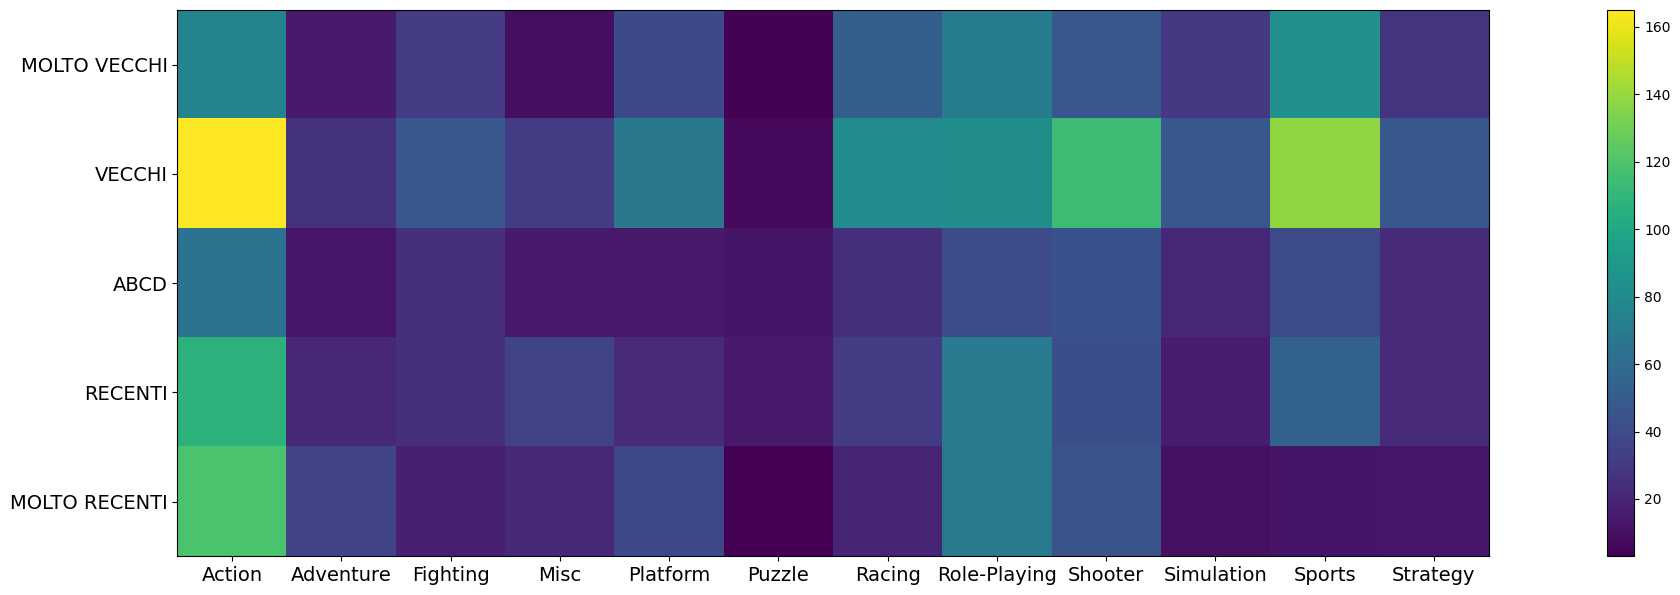

In [23]:
most_appreciated = OLAP[2,:,:]
plt.figure(figsize=(24, 6))
plt.imshow(most_appreciated, cmap='viridis')
plt.tight_layout()
plt.xticks(np.arange(len(quantize_genre)), quantize_genre, fontsize=14)
plt.yticks(np.arange(len(quantize_year)), quantize_year, fontsize = 14) 
plt.colorbar()

Come possiamo vedere da questo OLAP, tra i giochi molto vecchi i due generi più apprezzati dagli utenti sono Action e Sports, da segnalare anche i Role-Playing e gli Shooter games, particolarmente apprezzati dagli utenti di quegli anni.
Tra i videgiochi vecchi l'andamento tra i generi è più simile con una leggera preferenza per il genere Action.
Infine, tra i videogiochi più recenti spicca ancora il genere Action e tornano ad essere apprezzati gradualmente i Role-Playing games.
Dall'OLAP si capisce anche che un genere di vidogiochi mai troppo apprezzato dai giocatori è il Puzzle, come possiamo vedere anche osservando il suo grafico a linea confrontato con quello dei giochi Action (con il numero più alto di giochi più apprezzati) e dei Racing (che ha avuto sempre un numero nella media di giochi più apprezzati)

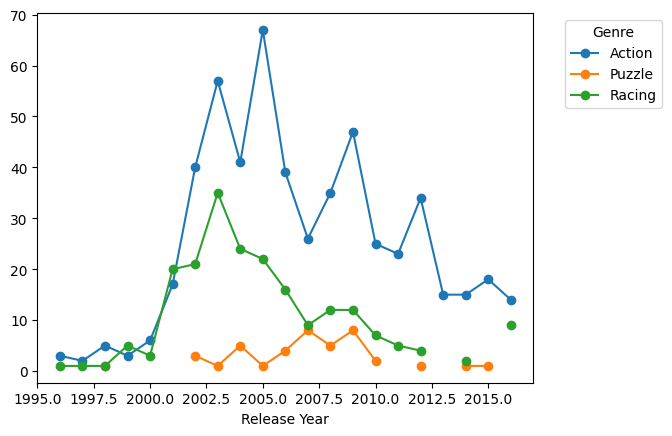

<Figure size 3400x1200 with 0 Axes>

In [24]:
filtered_games = video_games[(video_games['quantize_user_score'] == 'MOLTO APPREZZATI') & ((video_games['Genre'] == 'Racing') | (video_games['Genre'] == 'Action') | (video_games['Genre'] == 'Puzzle'))]

avg_rating_by_genre_year = filtered_games.groupby([filtered_games['Year_of_Release'], filtered_games['Genre']])['User_Score'].size().unstack()

# Plot each genre as a separate line
for genre in avg_rating_by_genre_year.columns:
    plt.plot(avg_rating_by_genre_year.index, avg_rating_by_genre_year[genre], marker='o', label=genre)

# Add labels and title
plt.xlabel('Release Year')

# Show legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure(figsize=(34,12))

# Show the plot
plt.tight_layout()
plt.show()

<Axes: title={'center': 'User_Score'}, xlabel='Genre'>

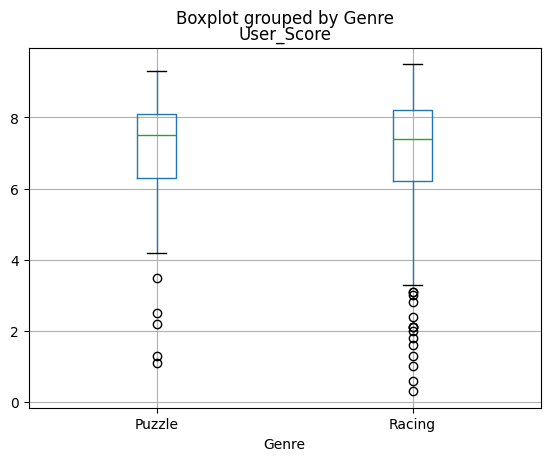

In [25]:
filtered_games = video_games[((video_games['Genre'] == 'Puzzle') | (video_games['Genre'] == 'Racing'))]
filtered_games.boxplot(column=['User_Score'], by='Genre')

**Test statistici**


In [26]:
video_games[video_games['Genre']== 'Racing'].shape

(629, 18)

In [27]:
filtered_games[filtered_games['Genre']== 'Puzzle'].shape

(125, 18)

In [28]:
video_games.shape

(7463, 18)

In [29]:
t_value, p_value =  stats.ttest_ind(video_games.loc[video_games['Genre'] == 'Racing', 'User_Score'], video_games.loc[video_games['Genre'] == 'Puzzle', 'User_Score'])

print(p_value)

0.5191471434361586


In [30]:
video_games.dropna(axis=0, subset=['Critic_Score'], inplace=True)

In [31]:
print(pd.qcut(video_games['Critic_Score'], q=3))

0          (66.0, 78.0]
2          (78.0, 98.0]
3          (78.0, 98.0]
6          (78.0, 98.0]
7        (12.999, 66.0]
              ...      
16677      (78.0, 98.0]
16696      (78.0, 98.0]
16700    (12.999, 66.0]
16706    (12.999, 66.0]
16709    (12.999, 66.0]
Name: Critic_Score, Length: 6894, dtype: category
Categories (3, interval[float64, right]): [(12.999, 66.0] < (66.0, 78.0] < (78.0, 98.0]]


In [32]:
min = [13, 66, 78]
max = [66, 78, 98]
quantize_critic_score = ['POCO APPREZZATI','APPREZZATI','MOLTO APPREZZATI']
for i in range(0,3):
  video_games.loc[video_games['Critic_Score'].between(min[i], max[i], 'both'), 'quantize_critic_score'] = quantize_critic_score[i]

In [33]:
OLAP_critic = np.zeros((len(quantize_critic_score), len(quantize_year), len(quantize_genre)))

for z in range(len(quantize_genre)):
    genre = quantize_genre[z]  # Access the genre at index z
    Awards_prog_z = video_games[video_games['Genre'] == genre]  # Filter based on the genre
    for j in range(len(quantize_year)):
        for i in range(len(quantize_critic_score)):
            OLAP_critic[i, j, z] = np.sum((Awards_prog_z['quantize_critic_score'] == quantize_critic_score[i]) & (Awards_prog_z['quantize_year'] == quantize_year[j]))

In [34]:
most_appreciated_Action_user_score = OLAP[2, 1, :]
most_appreciated_Action_critic_score = OLAP_critic[2, 1, :]

In [35]:
most_appreciated_Action_critic_score *= most_appreciated_Action_user_score.sum() / most_appreciated_Action_critic_score.sum()

In [36]:
chi, p_value = stats.chisquare(f_obs=most_appreciated_Action_critic_score, f_exp=most_appreciated_Action_user_score)
print(chi)

87.25268205645375


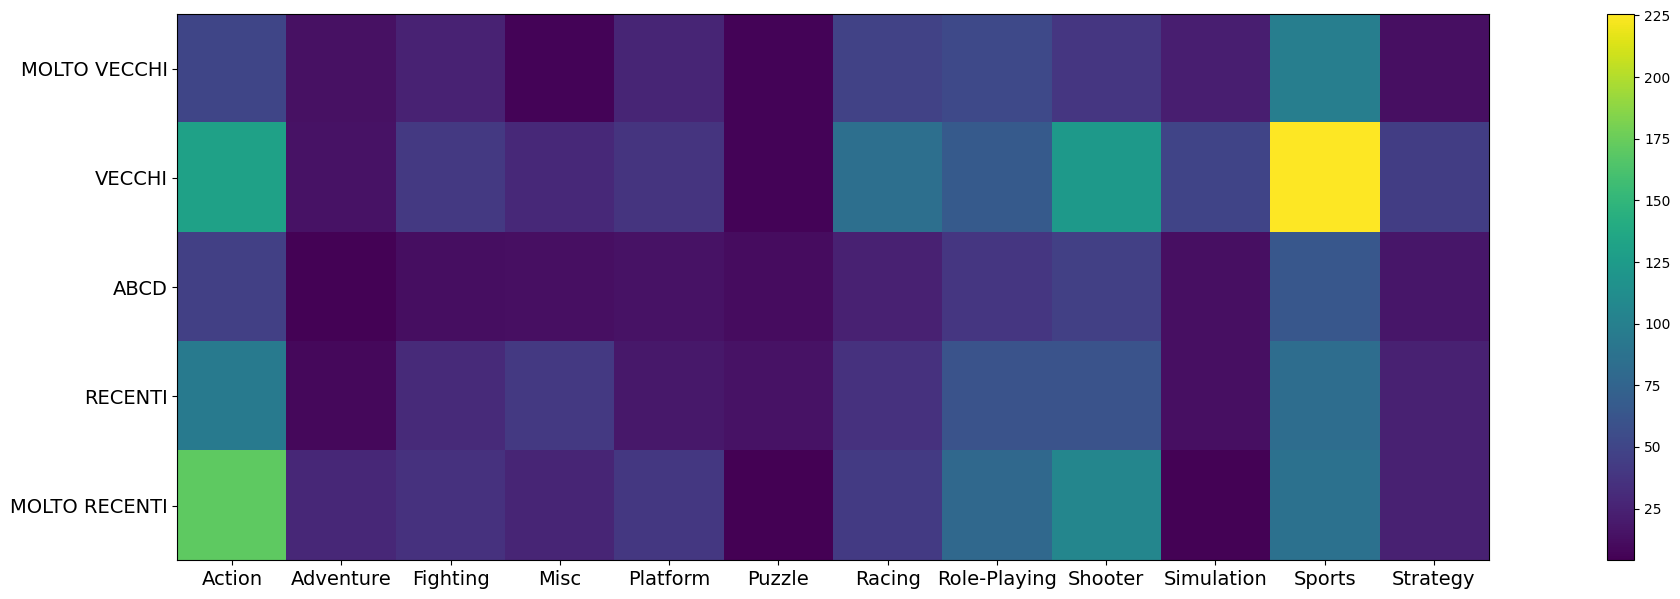

In [37]:
most_appreciated_critic = OLAP_critic[2,:,:]
plt.figure(figsize=(24, 6))
plt.imshow(most_appreciated_critic, cmap='viridis')
plt.tight_layout()
plt.xticks(np.arange(len(quantize_genre)), quantize_genre, fontsize=14)
plt.yticks(np.arange(len(quantize_year)), quantize_year, fontsize = 14) 
plt.colorbar()

## METODO PREDITTIVO

Text(0, 0.5, 'Critic_Score')

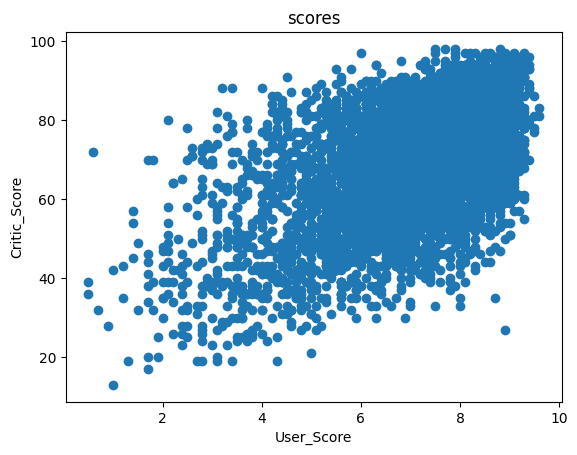

In [38]:
plt.scatter(video_games['User_Score'], video_games['Critic_Score'])
plt.title('scores')
plt.xlabel('User_Score')
plt.ylabel('Critic_Score')

In [39]:
r = video_games[['User_Score','Critic_Score']].corr()
print(r)

              User_Score  Critic_Score
User_Score      1.000000      0.579671
Critic_Score    0.579671      1.000000
